# Kwajalein location

## Filter Tropical Cyclones (TCs) that affect the site and their parameterization

inputs required: 
  * Storm tracks records (ibtracks file)
  * longitude and latitude of the site (location of the waves record)
  * radius for TCs selection (º)

in this notebook:
  * selection of TCs affecting the site (two radiouses of influence)
  * parameterization of TC tracks based on forward speed, mean pressure, and angles of entrance
  * analysis of changes in category between radiouses

In [30]:

#!/usr/bin/env python
# -*- coding: utf-8 -*-

# common
import os
import os.path as op
import glob
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# pip
import xarray as xr
import numpy as np


# DEV: override installed teslakit
import sys
sys.path.insert(0, op.join(os.path.abspath(''), '..', '..', '..'))

# teslakit
from teslakit.io.matlab import ReadNakajoMats_sara
from teslakit.database import Database
from teslakit.storms import Extract_Circle_STORM, Extract_Circle_list, Extract_Circle, ReadStormFiles
from teslakit.mda import MaxDiss_Simplified_NoThreshold
from teslakit.plotting.storms import Plot_TCs_STORMSbase_Tracks, Plot_TCs_Params_STORM_MDAvsSIM, \
    Plot_TCs_Params_HISTvsSIM, Plot_TCs_Params_HISTvsSIM_histogram, Plot_TCs_Tracks_Category, Plot_TCs_HistoricalTracks, \
    Plot_TCs_Tracks_Category, Plot_TCs_Params_MDAvsSIM


## Load Databases and location parameters

In [18]:
#%% path

p_data = r'/Users/anacrueda/Documents/Proyectos/TESLA/data' 
p_data_temp = r'/Users/anacrueda/Documents/Data/STORMs/data'

db = Database(p_data)

# set site
db.SetSite('MAJURO')


# wave point longitude and latitude
pnt_lon = 171.18
pnt_lat = 7.11

# radius for TCs selection (º)
r1 = 14
r2 = 4


In [3]:
# --------------------------------------
# load data and set parameters

TCs_wmo = db.Load_TCs_noaa()  # noaa Allstorms.ibtracs_wmo



## Historical TCs - extraction

In [4]:
# dictionary with needed variable names

d_vns = {
    'longitude': 'lon_wmo',
    'latitude': 'lat_wmo',
    'time': 'time_wmo',
    'pressure': 'pres_wmo',
}

# Select TCs that crosses a circular area R1
TCs_r1_hist_tracks, TCs_r1_hist_params = Extract_Circle(
    TCs_wmo, pnt_lon, pnt_lat, r1, d_vns)
print('Numer of storms inside R1: ',TCs_r1_hist_tracks.storm.size)

# Select TCs that crosses a circular area R2
TCs_r2_hist_tracks, TCs_r2_hist_params = Extract_Circle(
    TCs_wmo, pnt_lon, pnt_lat, r2, d_vns)
print('Numer of storms inside R2: ',TCs_r2_hist_tracks.storm.size)

# store data
db.Save_TCs_r1_hist(TCs_r1_hist_tracks, TCs_r1_hist_params)
db.Save_TCs_r2_hist(TCs_r2_hist_tracks, TCs_r2_hist_params)

7367
Numer of storms inside R1:  209
7367
Numer of storms inside R2:  39


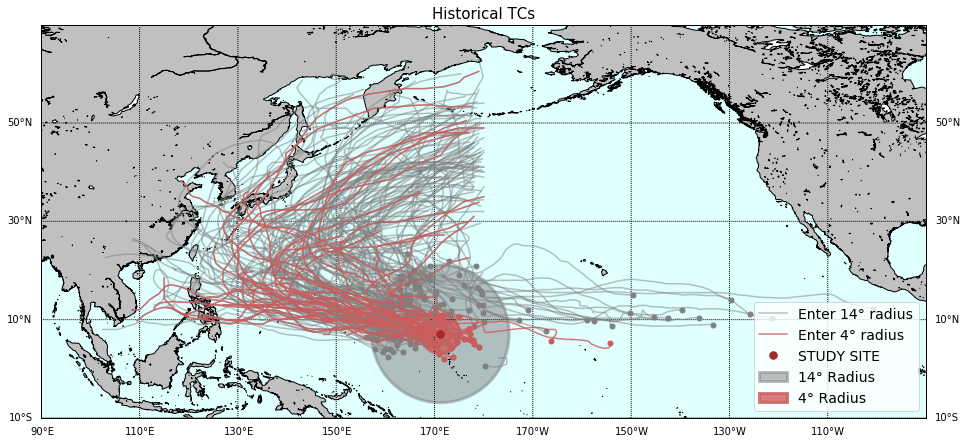

In [5]:
# Plot storm tracks world map (requires basemap)

lon1, lon2 = 90, 270
lat1, lat2 = -10, 70

if pnt_lon < 0: pnt_lon=pnt_lon+360

Plot_TCs_HistoricalTracks(
    TCs_r1_hist_tracks, TCs_r2_hist_tracks,
    lon1, lon2, lat1, lat2,
    pnt_lon, pnt_lat, r1, r2, d_vns,
);

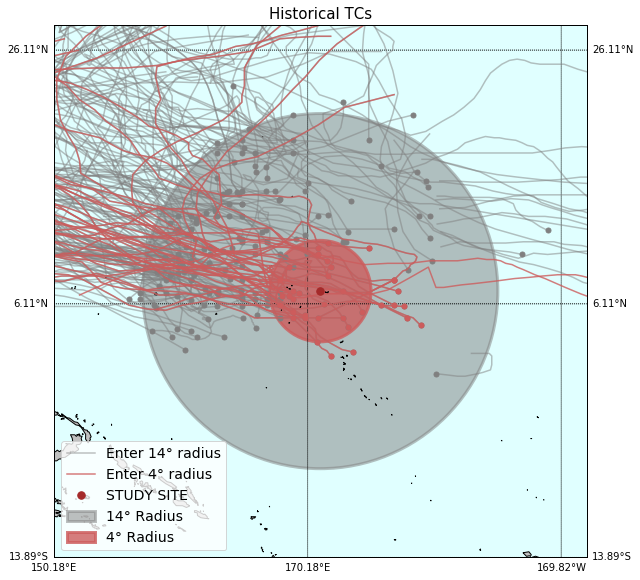

In [6]:
# zoom map

r_zoom = 21

Plot_TCs_HistoricalTracks(
    TCs_r1_hist_tracks, TCs_r2_hist_tracks,
    pnt_lon-r_zoom, pnt_lon+r_zoom, pnt_lat-r_zoom, pnt_lat+r_zoom,
    pnt_lon, pnt_lat, r1, r2, d_vns,
);

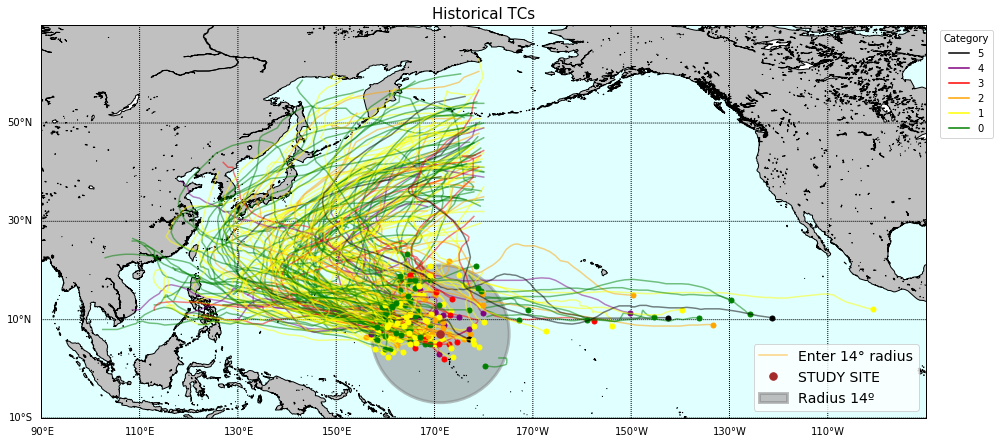

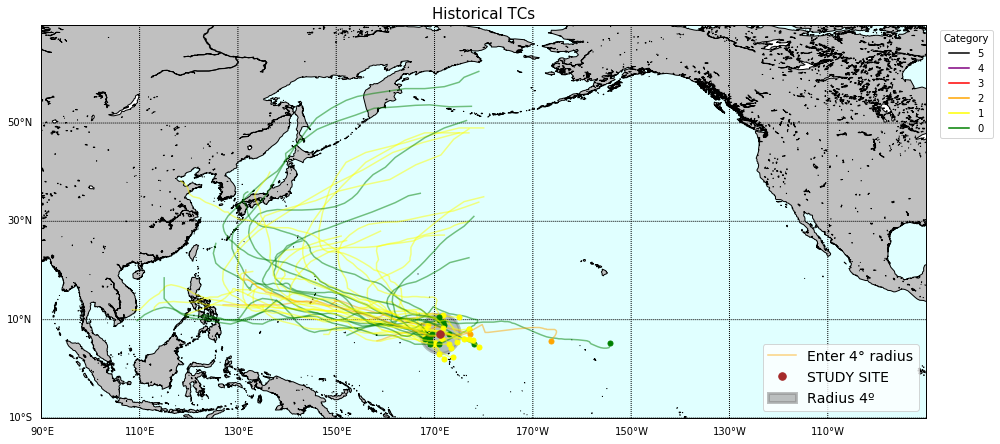

In [7]:
# Plot storm tracks category world map (requires basemap)

lon1, lon2 = 90, 270
lat1, lat2 = -10, 70

if pnt_lon < 0: pnt_lon=pnt_lon+360

# r1
Plot_TCs_Tracks_Category(
    TCs_r1_hist_tracks, TCs_r1_hist_params.category,
    lon1, lon2, lat1, lat2,
    pnt_lon, pnt_lat, r1, d_vns, 'Historical'
);

# r2
Plot_TCs_Tracks_Category(
    TCs_r2_hist_tracks, TCs_r2_hist_params.category,
    lon1, lon2, lat1, lat2,
    pnt_lon, pnt_lat, r2, d_vns, 'Historical'
);


## Synthetic TCs (Nakajo) - extraction

In [8]:
# Nakajo (synthetic)
p_nakajo = r'/Users/anacrueda/Documents/Proyectos/TESLA/data/sites/KWA/TCs/Nakajo_tracks'
ls_xds_nakajo = ReadNakajoMats_sara(p_nakajo)


In [12]:

# dictionary with needed variable names

d_vns = {
    'longitude':'ylon_TC',
    'latitude':'ylat_TC',
    'time': 'yts',
    'pressure':'yCPRES',
}

TCs_r1_sim_tracks, TCs_r1_sim_params = Extract_Circle_list(ls_xds_nakajo, pnt_lon, pnt_lat, r1, d_vns)
print('Numer of storms inside R1: ',TCs_r1_sim_tracks.storm.size)

TCs_r2_sim_tracks, TCs_r2_sim_params = Extract_Circle_list(ls_xds_nakajo, pnt_lon, pnt_lat, r2, d_vns)
print('Numer of storms inside R2: ',TCs_r2_sim_tracks.storm.size)

db.Save_TCs_r2_sim(TCs_r2_sim_tracks, TCs_r2_sim_params)

100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
Numer of storms inside R1:  48400
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
Numer of storms inside R2:  9855


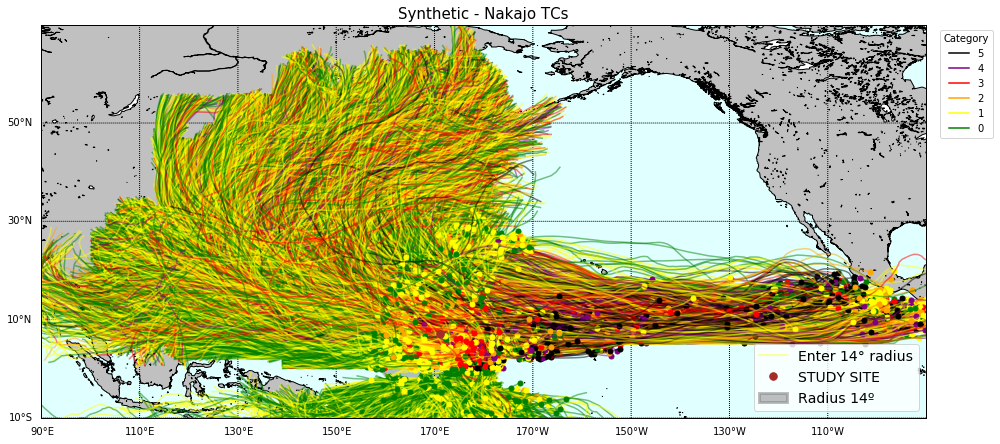

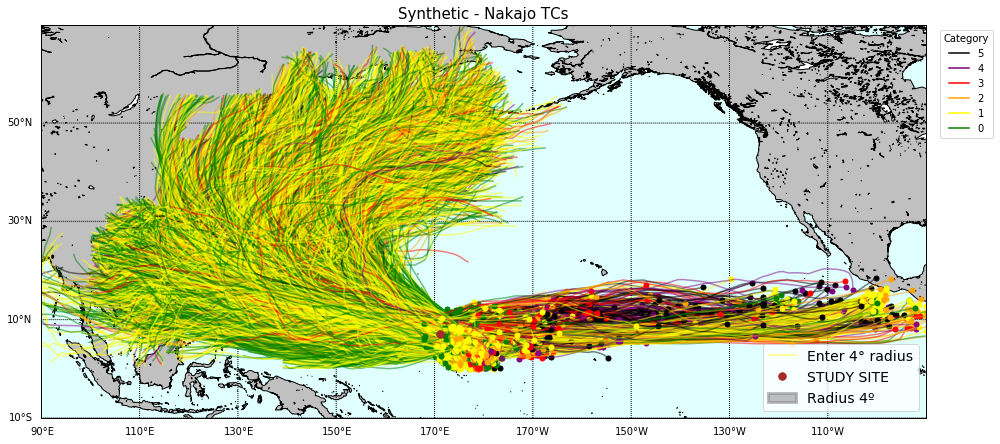

In [13]:
# Plot storm tracks category world map (requires basemap)

# r1
Plot_TCs_Tracks_Category(
    TCs_r1_sim_tracks, 
    TCs_r1_sim_params.category,
    lon1, lon2, lat1, lat2,
    pnt_lon, pnt_lat, r1, d_vns, 'Synthetic - Nakajo'
);

# r2
Plot_TCs_Tracks_Category(
    TCs_r2_sim_tracks, 
    TCs_r2_sim_params.category,
    lon1, lon2, lat1, lat2,
    pnt_lon, pnt_lat, r2, d_vns, 'Synthetic - Nakajo'
);


## Synthetic TCs (STORMS) - extraction

In [14]:
# choose the basin. STORM consider independent basins, therefore the synthetic TCs wont cross from one basin to the other.
basins = ['WP'] # EP: Eastern Pacific, NA: North Atlantic, NI: North Indian, 
             # SI: South Indian, SP: South Pacific, WP: Western Pacific


In [15]:
#tc_storms = ReadStormFiles(p_data_temp, basin)
# load data and set parameters

# read STORM database
tc_storms = ReadStormFiles(p_data_temp,basins)

print(tc_storms)

<xarray.Dataset>
Dimensions:        (storm: 8911561)
Coordinates:
  * storm          (storm) int64 0 0 0 0 0 ... 225294 225294 225294 225294
Data variables:
    year           (storm) int64 0 0 0 0 0 0 0 ... 9999 9999 9999 9999 9999 9999
    month          (storm) int64 9 9 9 9 9 9 9 9 9 9 9 ... 7 7 7 8 8 8 8 8 8 8 8
    TimeStep       (storm) int64 0 1 2 3 4 5 6 7 8 9 10 ... 8 9 0 1 2 3 4 5 6 7
    Basin          (storm) float64 5.0 5.0 5.0 5.0 5.0 ... 5.0 5.0 5.0 5.0 5.0
    lat            (storm) float64 15.6 15.8 16.1 16.4 ... 15.8 16.3 16.8 17.3
    lon            (storm) float64 136.8 136.5 136.2 135.9 ... 122.0 121.9 121.9
    pressure_min   (storm) float64 993.4 989.1 986.6 986.6 ... 991.8 991.8 993.6
    windspeed_max  (storm) float64 18.01 20.8 22.4 22.3 ... 19.1 19.08 17.75
    rmax           (storm) float64 46.3 45.91 45.53 45.14 ... 67.91 89.51 111.1
    cat            (storm) int64 0 0 0 0 0 0 0 0 0 0 0 ... 0 -1 0 0 0 0 0 0 0 -1
    land           (storm) int64 0 0 0 0 0 

In [16]:
# homogenize times (avoid duplicate values) # storm 18, 19 # demasiado lento!!!!
n_storms = np.unique(tc_storms.storm)
storms = tc_storms.storm.values[:]
times = tc_storms.TimeStep.values[:]
for storm in n_storms:
    pos_storm = [storms == storm]
    times_s = times[pos_storm]
    u, c = np.unique(times_s, return_counts=True)
    dup = u[c > 1]
    if len(dup) > 1:
        #print(storm)
        times[pos_storm] = np.arange(len(times_s))
      #  print(times[pos_storm])
              
tc_storms.update({'TimeStep':('storm',times)})


<xarray.Dataset>
Dimensions:        (storm: 8911561)
Coordinates:
  * storm          (storm) int64 0 0 0 0 0 ... 225294 225294 225294 225294
Data variables:
    year           (storm) int64 0 0 0 0 0 0 0 ... 9999 9999 9999 9999 9999 9999
    month          (storm) int64 9 9 9 9 9 9 9 9 9 9 9 ... 7 7 7 8 8 8 8 8 8 8 8
    TimeStep       (storm) int64 0 1 2 3 4 5 6 7 8 9 10 ... 8 9 0 1 2 3 4 5 6 7
    Basin          (storm) float64 5.0 5.0 5.0 5.0 5.0 ... 5.0 5.0 5.0 5.0 5.0
    lat            (storm) float64 15.6 15.8 16.1 16.4 ... 15.8 16.3 16.8 17.3
    lon            (storm) float64 136.8 136.5 136.2 135.9 ... 122.0 121.9 121.9
    pressure_min   (storm) float64 993.4 989.1 986.6 986.6 ... 991.8 991.8 993.6
    windspeed_max  (storm) float64 18.01 20.8 22.4 22.3 ... 19.1 19.08 17.75
    rmax           (storm) float64 46.3 45.91 45.53 45.14 ... 67.91 89.51 111.1
    cat            (storm) int64 0 0 0 0 0 0 0 0 0 0 0 ... 0 -1 0 0 0 0 0 0 0 -1
    land           (storm) int64 0 0 0 0 0 0 0 0 0 0 0 ... 1 1 1 0 1 0 0 0 1 1 1
    dist_land      (storm) float64 682.9 712.6 753.9 795.8 ... 33.71 0.0 0.0 0.0

In [19]:

# radius for TCs selection (º)
r1 = 14
r2 = 4


# Get STORMS TCs at the study area
# dictionary with needed variable names
d_vns = {
    'longitude':'lon',
    'latitude':'lat',
    'time': 'TimeStep',
    'pressure':'pressure_min',
    'radius':'rmax',
    'mwinds': 'windspeed_max',
}

# Extract STORMS TCs inside r2
TCs_r2_sim_tracks_STORM, TCs_r2_sim_params_STORM = Extract_Circle_STORM(tc_storms, pnt_lon, pnt_lat, r2, d_vns)
TCs_r2_sim_tracks_STORM = TCs_r2_sim_tracks_STORM.isel(storm = slice(0,len(TCs_r2_sim_params_STORM.storm)))

db.Save_TCs_r2_sim_storm(TCs_r2_sim_tracks_STORM, TCs_r2_sim_params_STORM)

(225255, 506)


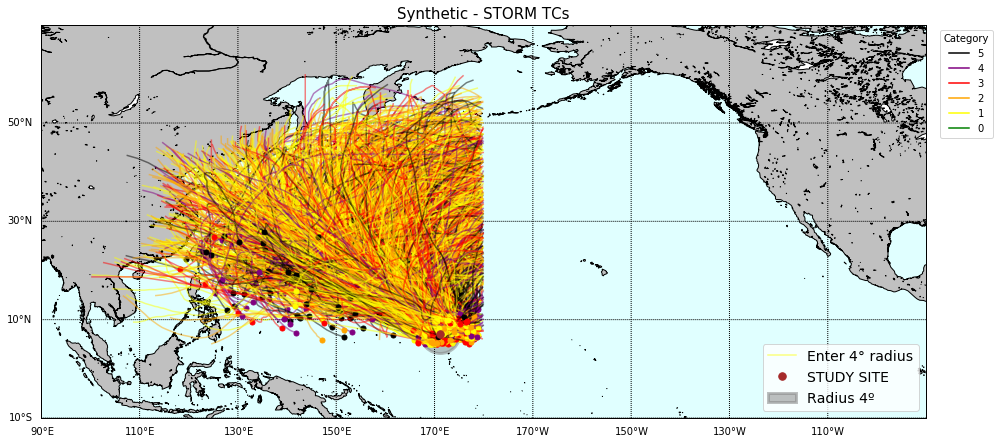

In [21]:
# Plot storm tracks category world map (requires basemap)

# r2
Plot_TCs_Tracks_Category(
    TCs_r2_sim_tracks_STORM, 
    TCs_r2_sim_params_STORM.category,
    lon1, lon2, lat1, lat2,
    pnt_lon, pnt_lat, r2, d_vns, 'Synthetic - STORM'
);


## Real tracks vs Parameterized tracks inside R2


### HISTORIC

In [ ]:
# Plot Historical TCs inside R2 (real tracks and parametrized tracks)
#Plot_TCs_TracksParams(TCs_r2_hist_tracks, TCs_r2_hist_params, 'lon_wmo', 'lat_wmo');



### SYNTHETIC - NAKAJO

In [ ]:
# Plot Historical TCs inside R2 (real tracks and parametrized tracks)
#Plot_TCs_TracksParams(TCs_r2_sim_tracks, TCs_r2_sim_params, 'ylon_TC', 'ylat_TC');



### SYNTHETIC - STORMS

In [ ]:
# Plot Historical TCs inside R2 (real tracks and parametrized tracks)
#Plot_TCs_TracksParams(TCs_r2_sim_tracks_STORM, TCs_r2_sim_params_STORM, 'lon', 'lat');



## Historical vs Nakajo parameters inside R2

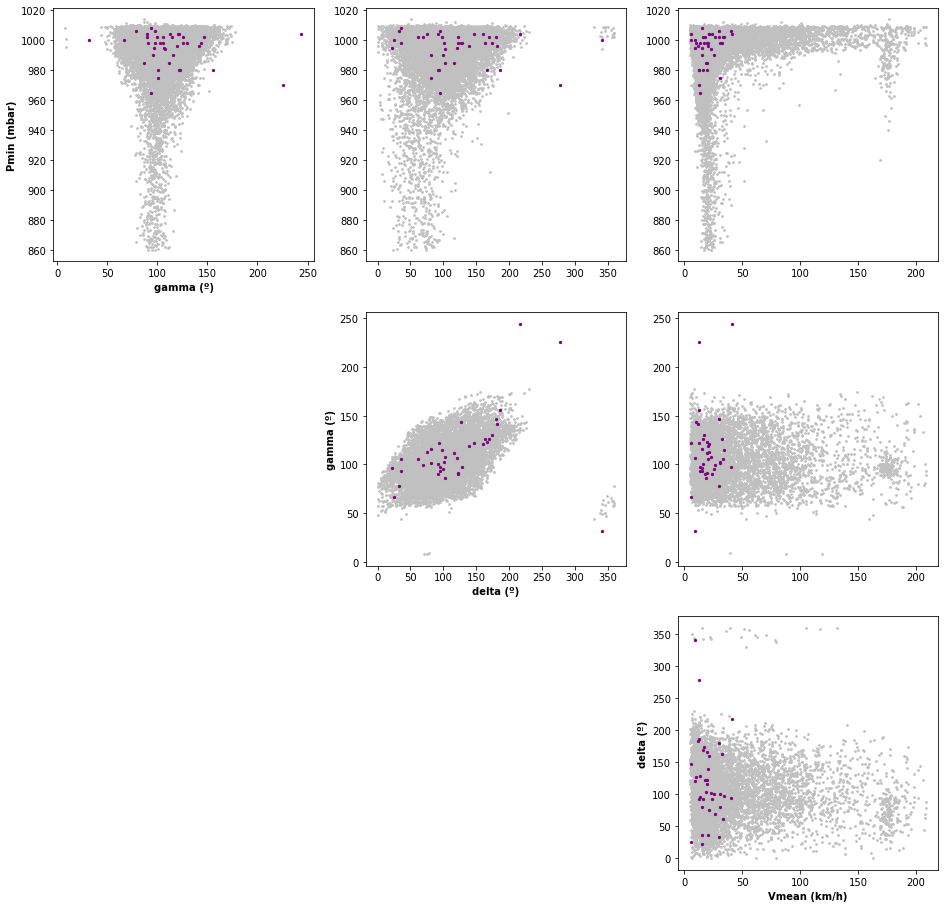

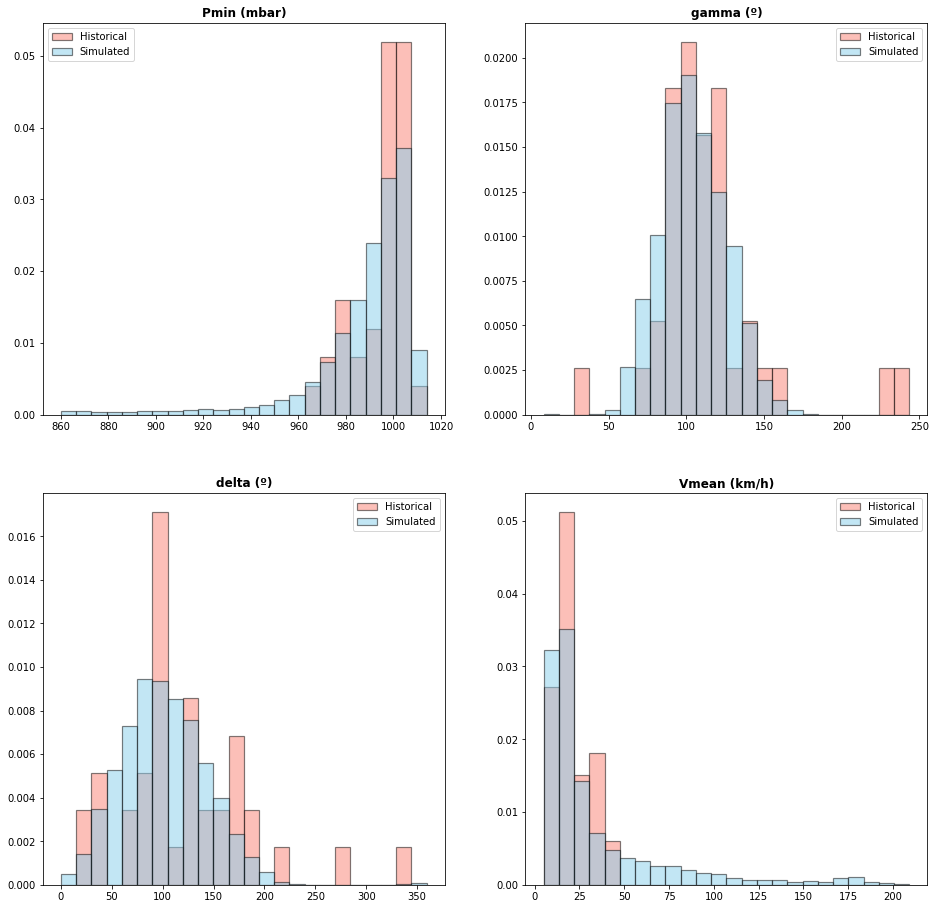

In [22]:
# scatter plot
Plot_TCs_Params_HISTvsSIM(TCs_r2_hist_params, TCs_r2_sim_params);

# histogram
Plot_TCs_Params_HISTvsSIM_histogram(TCs_r2_hist_params, TCs_r2_sim_params);



## Historical vs STORMS parameters inside R2

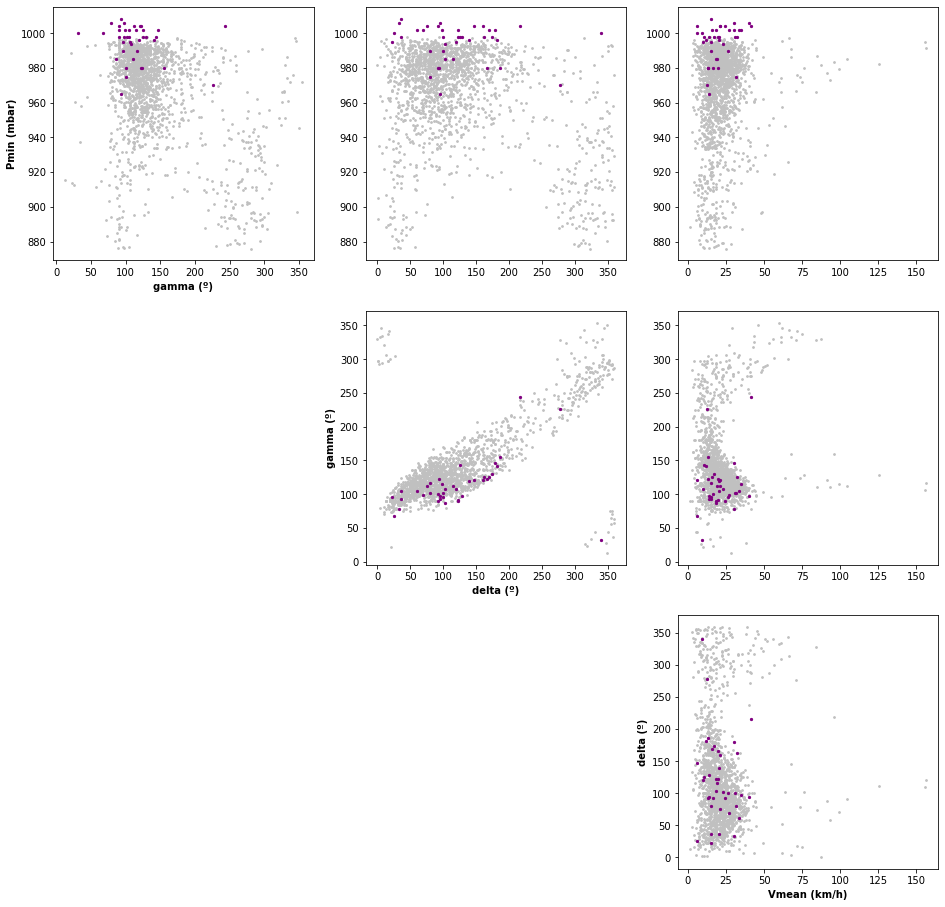

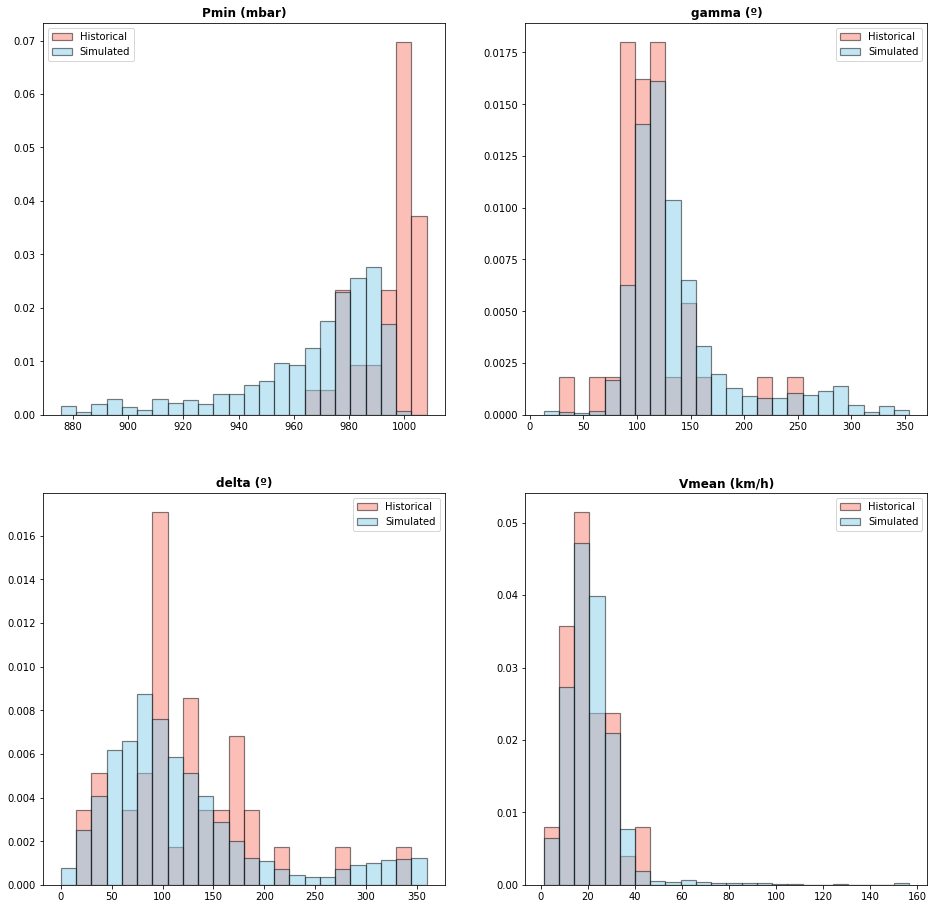

In [23]:
# scatter plot
Plot_TCs_Params_HISTvsSIM(TCs_r2_hist_params, TCs_r2_sim_params_STORM);

# histogram
Plot_TCs_Params_HISTvsSIM_histogram(TCs_r2_hist_params, TCs_r2_sim_params_STORM);


# MDA selection
### after the analysis of the synthetic databases, we will proceed with the filtering of anomalous events from the nakajo database which performs better in this side of the pacific, and the selection of events to simulate. 

## Filtering
#### based on historical tcs characteristics in r1 

In [24]:
print(TCs_r1_hist_params)

<xarray.Dataset>
Dimensions:        (storm: 209)
Coordinates:
  * storm          (storm) int64 1660 1665 1742 1763 ... 7309 7337 7341 7350
Data variables:
    pressure_min   (storm) float32 970.0 980.0 940.0 ... 1008.0 1006.0 1006.0
    pressure_mean  (storm) float32 988.94116 991.13336 ... 1007.2308 1006.6667
    velocity_mean  (storm) float64 17.28 13.67 24.9 23.98 ... 21.6 23.55 24.23
    gamma          (storm) float64 173.7 196.8 173.0 72.82 ... 98.35 94.25 137.3
    delta          (storm) float64 242.0 276.0 186.1 37.7 ... 73.72 49.21 152.9
    category       (storm) int64 2 1 4 1 1 0 0 1 1 2 1 ... 2 0 2 1 0 1 0 0 0 0 0
    dmin_date      (storm) datetime64[ns] 1951-03-21T06:00:00 ... 2016-11-08T18:00:00
    last_date      (storm) datetime64[ns] 1951-03-27T06:00:00 ... 2016-11-13
    index_in       (storm) int64 0 2 0 0 0 0 0 0 0 37 0 ... 0 0 0 0 0 0 2 0 0 0
    index_out      (storm) int64 33 16 4 7 8 3 3 8 14 ... 12 8 2 5 18 3 4 12 2
Attributes:
    point_lon:  171.18
    point_

In [25]:
maxV = np.max(TCs_r1_hist_params.velocity_mean.values[:]) + np.max(TCs_r1_hist_params.velocity_mean.values[:])/10
minP = np.min(TCs_r1_hist_params.pressure_min.values[:]) - np.min(TCs_r1_hist_params.pressure_min.values[:])*2/100
print('Maximum velocity mean: ', round(maxV,2))
print('Minimum pressure: ', minP)

Maximum velocity mean:  61.59
Minimum pressure:  882.0


In [26]:
storms_filtered = []
for i in TCs_r2_sim_params.storm.values:
    storm_i = TCs_r2_sim_params.sel(storm=i)
    if (storm_i.velocity_mean.values < maxV) & \
        (storm_i.pressure_min.values > minP):
        storms_filtered.append(i)

TCs_r2_sim_params_filtered = TCs_r2_sim_params.sel(storm = storms_filtered)
print('Numer of storms inside R2: ',TCs_r2_sim_params.storm.size)
print('Numer of FILTERED storms inside R2: ',TCs_r2_sim_params_filtered.storm.size)


Numer of storms inside R2:  9855
Numer of FILTERED storms inside R2:  8251


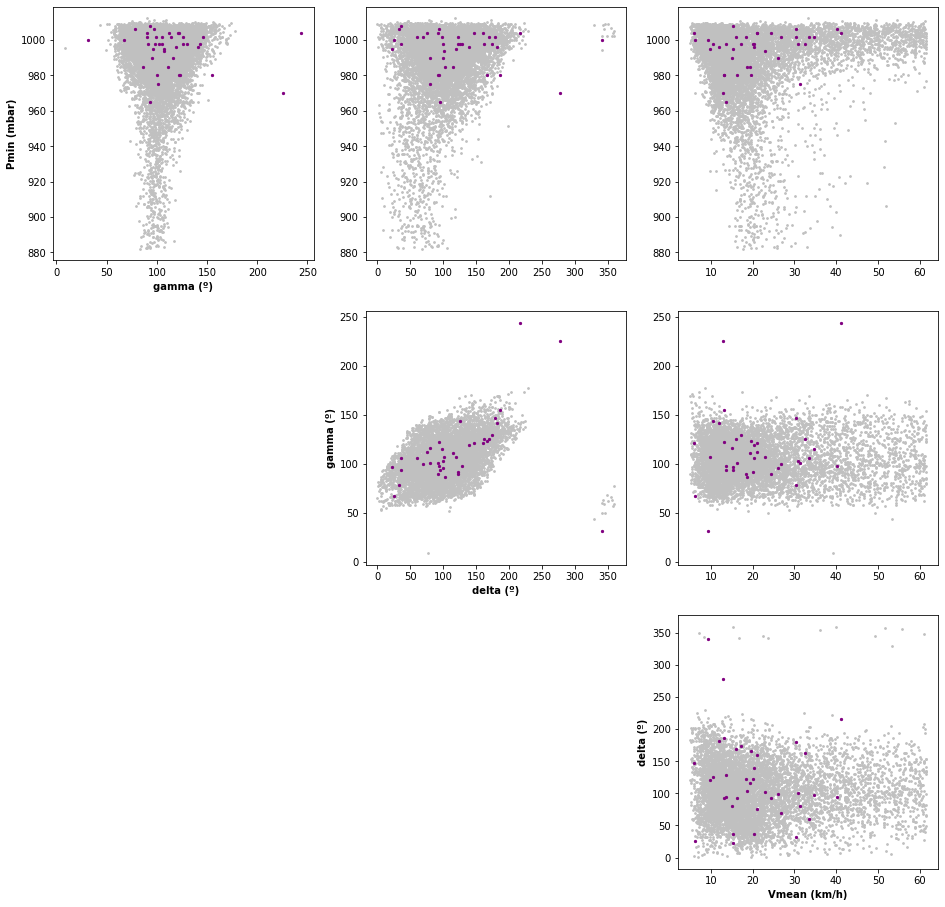

In [27]:
# scatter plot FILTERED
Plot_TCs_Params_HISTvsSIM(TCs_r2_hist_params, TCs_r2_sim_params_filtered);


In [28]:
# --------------------------------------
# MaxDiss classification
# MDA number of cases
num_sel_mda = 1000


# get simulated parameters  
pmean_s = np.concatenate([TCs_r2_hist_params.pressure_mean.values[:], TCs_r2_sim_params_filtered.pressure_mean.values[:]])
pmin_s  = np.concatenate([TCs_r2_hist_params.pressure_min.values[:], TCs_r2_sim_params_filtered.pressure_min.values[:]])
gamma_s = np.concatenate([TCs_r2_hist_params.gamma.values[:],TCs_r2_sim_params_filtered.gamma.values[:]])
delta_s = np.concatenate([TCs_r2_hist_params.delta.values[:], TCs_r2_sim_params_filtered.delta.values[:]])
vmean_s = np.concatenate([TCs_r2_hist_params.velocity_mean.values[:], TCs_r2_sim_params_filtered.velocity_mean.values[:]])

# subset, scalar and directional indexes
data_mda = np.column_stack((pmean_s, pmin_s, vmean_s, delta_s, gamma_s))
ix_scalar = [0,1,2]
ix_directional = [3,4]

# MDA
centroids = MaxDiss_Simplified_NoThreshold(
    data_mda, num_sel_mda, ix_scalar, ix_directional 
)


# store MDA storms - parameters 
TCs_r2_MDA_params = xr.Dataset(
    {
        'pressure_mean':(('storm'), centroids[:,0]),
        'pressure_min':(('storm'), centroids[:,1]),
        'velocity_mean':(('storm'), centroids[:,2]),
        'delta':(('storm'), centroids[:,3]),
        'gamma':(('storm'), centroids[:,4]),
    },
    coords = {
        'storm':(('storm'), np.arange(num_sel_mda))    
    },
)
print(TCs_r2_MDA_params)

db.Save_TCs_r2_mda_params(TCs_r2_MDA_params)



MaxDiss waves parameters: 8290 --> 1000

   MDA centroids: 1000/1000

<xarray.Dataset>
Dimensions:        (storm: 1000)
Coordinates:
  * storm          (storm) int64 0 1 2 3 4 5 6 7 ... 993 994 995 996 997 998 999
Data variables:
    pressure_mean  (storm) float64 1.013e+03 883.3 976.5 ... 948.2 993.8
    pressure_min   (storm) float64 1.012e+03 882.9 970.0 ... 947.9 991.0
    velocity_mean  (storm) float64 33.17 32.93 12.89 9.368 ... 59.31 22.16 9.385
    delta          (storm) float64 117.3 29.79 277.5 340.5 ... 101.4 17.34 60.0
    gamma          (storm) float64 90.12 106.8 225.8 31.75 ... 141.9 96.43 110.7


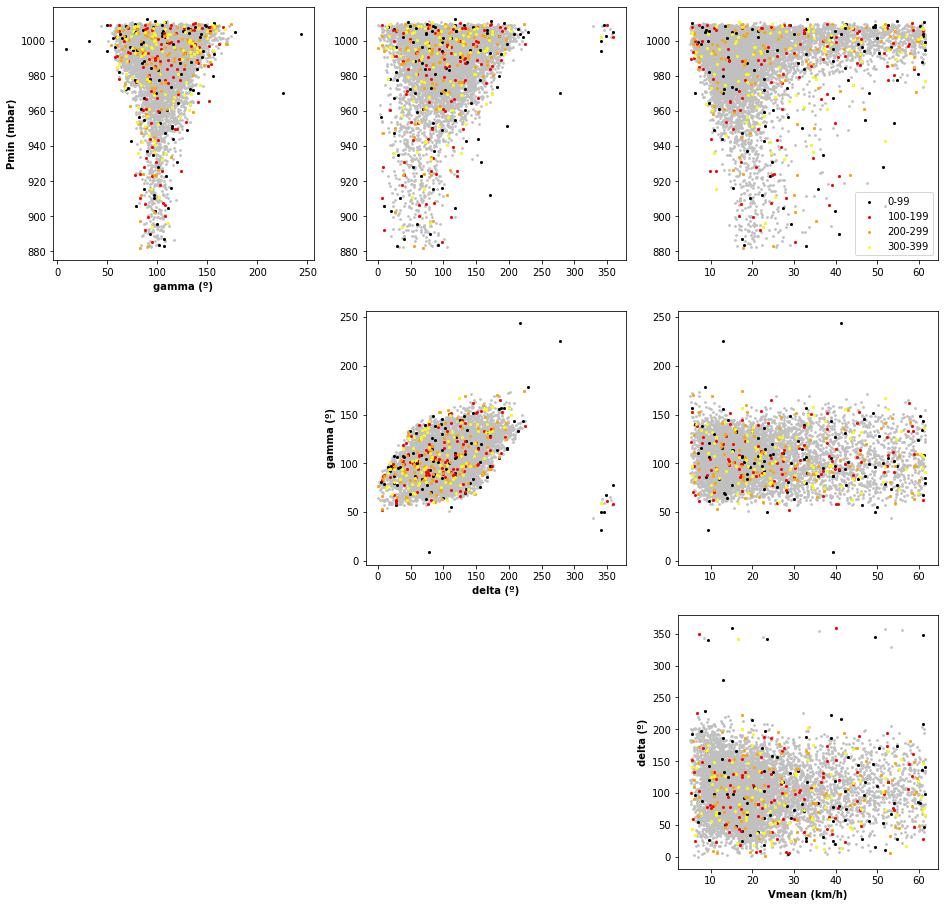

In [31]:
# MDA selecion: scatter plot parameters
Plot_TCs_Params_MDAvsSIM(TCs_r2_MDA_params, TCs_r2_sim_params_filtered);
